In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data:

In [2]:
df = pd.read_excel("./DocumentationSmell_Benchmark_Dataset.xlsx")

In [3]:
print("Number of instances:", df.shape[0])

Number of instances: 1000


In [4]:
df.sample(5)

,Id,Method Prototype,Documentation Text,Fragmented,Tangled,Excessive Structured,Bloated,Lazy
12,20,public Rectangle getInteriorRectangle(Componen...,public Rectangle getInteriorRectangle(Componen...,0,1,0,0,0
546,16088,"public void setSelectionInterval(int anchor, ...","public void setSelectionInterval(int anchor, ...",1,0,0,0,0
250,6895,public void addMouseListener(MouseListener l),public void addMouseListener(MouseListener l)_...,1,0,0,0,0
549,16094,public void setSelectedIndex(int index),public void setSelectedIndex(int index)_x000D_...,1,0,0,0,0
194,5515,public static boolean isDigit(int codePoint),public static boolean isDigit(int codePoint)_x...,0,0,0,0,0


In [5]:
df.rename(columns={"Id": "id", "Documentation Text": "text", "Fragmented": "label_fragmented", "Tangled": "label_tangled", "Excessive Structured": "label_excessive", "Bloated": "label_bloated", "Lazy": "label_lazy"}, inplace=True)

### Clean the data:

In [6]:
print("Number of missing texts:", df["text"].isnull().sum())

Number of missing texts: 0


In [7]:
print(f"Number of missing Fragmented labels:", df["label_fragmented"].isnull().sum())
print(f"Number of missing Tangled labels:", df["label_tangled"].isnull().sum())
print(f"Number of missing Excessive Structured labels:", df["label_excessive"].isnull().sum())
print(f"Number of missing Bloated labels:", df["label_bloated"].isnull().sum())
print(f"Number of missing Lazy labels:", df["label_lazy"].isnull().sum())

Number of missing Fragmented labels: 0
Number of missing Tangled labels: 0
Number of missing Excessive Structured labels: 0
Number of missing Bloated labels: 0
Number of missing Lazy labels: 0


In [8]:
print(f"Number of duplicated texts: {df["text"].duplicated().sum()} ({df["text"].duplicated().sum()/df.shape[0]:.2%})")

Number of duplicated texts: 56 (5.60%)


*WARNING: Duplicated texts is particularly high.*

### Analyze distributions:

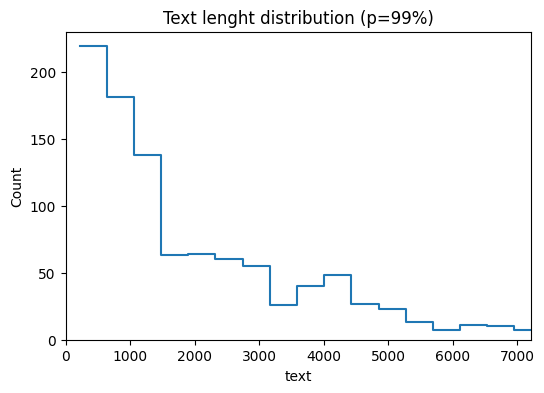

In [9]:
plt.figure(figsize=(6, 4))
sns.histplot(df["text"].str.len(), element="step", fill=False)
plt.xlim([0, df["text"].str.len().quantile(.99)])
plt.title("Text lenght distribution (p=99%)")
plt.show()

In [10]:
pd.concat([
    df[["label_fragmented"]].value_counts(dropna=False, normalize=True).round(2).to_frame("Fragmented"),
    df[["label_tangled"]].value_counts(dropna=False, normalize=True).round(2).to_frame("Tangled"),
    df[["label_excessive"]].value_counts(dropna=False, normalize=True).round(2).to_frame("Excessive Structured"),
    df[["label_bloated"]].value_counts(dropna=False, normalize=True).round(2).to_frame("Bloated"),
    df[["label_lazy"]].value_counts(dropna=False, normalize=True).round(2).to_frame("Lazy")
], axis=1)

,Fragmented,Tangled,Excessive Structured,Bloated,Lazy
0,0.77,0.75,0.75,0.86,0.72
1,0.23,0.25,0.25,0.14,0.28


In [11]:
df[[c for c in df.columns if c.startswith("label_")]].sum(axis=1).value_counts(normalize=True)

1    0.524
0    0.222
2    0.161
3    0.074
4    0.019
Name: proportion, dtype: float64

### Persist datasets:

In [12]:
df[["id", "text", "label_fragmented", "label_tangled", "label_excessive", "label_bloated", "label_lazy"]].to_parquet("./smell_doc.parquet", index=False)

In [13]:
print("Number of instances in the persisted dataset:", df.shape[0])

Number of instances in the persisted dataset: 1000
